In [43]:
from dataset.hico import build
import argparse
from PIL import Image, ImageDraw, ImageFont
from IPython.display import clear_output

In [9]:
parser = argparse.ArgumentParser(description="hico")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/HICO-DET/", type=str)
args = parser.parse_args([])

In [31]:
dataset_train = build("train", args)
dataset_val = build("val", args)
len(dataset_train), len(dataset_val)

(37633, 9546)

dict_keys(['orig_size', 'size', 'boxes', 'labels', 'iscrowd', 'area', 'pair_targets', 'pair_actions', 'sub_boxes', 'obj_boxes', 'relation_map', 'hois', 'image_id'])


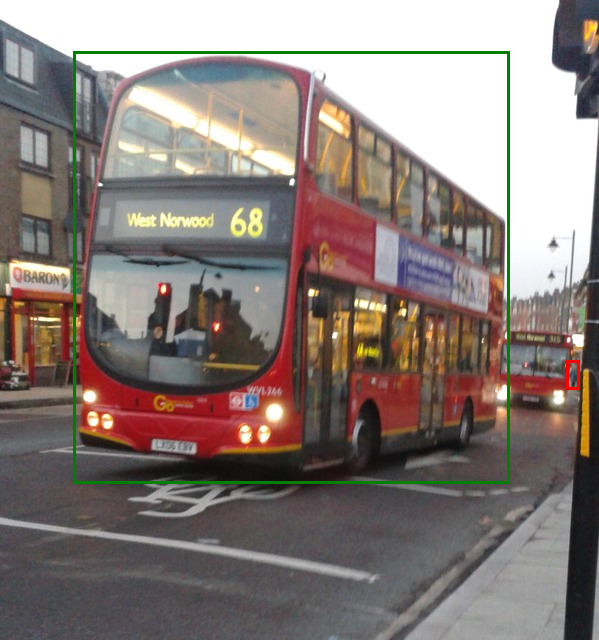

In [46]:
for i, (img, anno) in enumerate(dataset_train):
  draw = ImageDraw.Draw(img)
  print(anno.keys())
  hois = anno["hois"]
  for j, box in enumerate(anno["boxes"]):
    if j == 0:
      draw.rectangle((box[0], box[1], box[2], box[3]), outline="red", width=3)
    else:
      draw.rectangle((box[0], box[1], box[2], box[3]), outline="green", width=3)
  display(img)
  message = input(str(i))
  if message == 'end':
    break
  clear_output(True)

In [41]:
dataset_train.get_actions()[98]

'straddle'